In [1]:
from helpers import * 
from boundaries import *
from augment import *
from processor import *

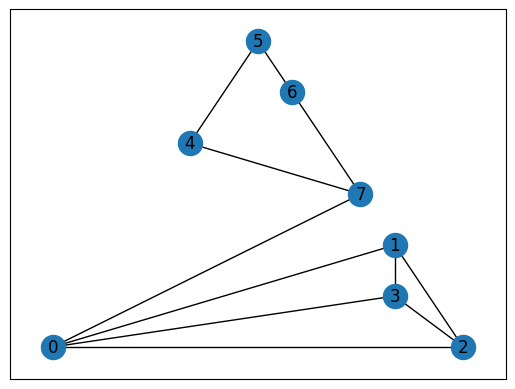

In [2]:
G_st = st_graph()   
plot_planar(G_st)

ic| cut_vertices: [7, 0]


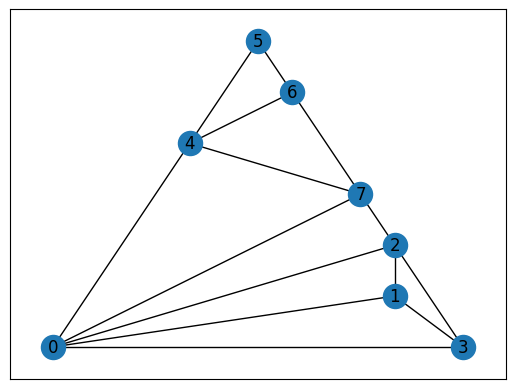

In [3]:
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m-n+1: 8


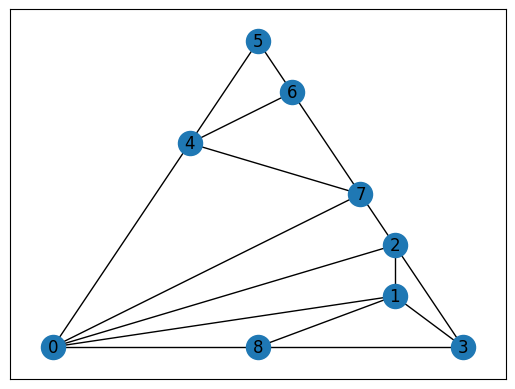

In [4]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [5]:
p.find_cips()
p.b.cips

[[0, 8, 3, 2], [4, 5, 6]]

In [6]:
p.start_four_connect()

In [7]:
p.b.locate_corner_nodes()

ic| f"NEW COORD {coord}": 'NEW COORD (-0.5402298850574713, 0.09770114942528735)'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'north'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'south'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'east'
ic| coord: (-0.5402298850574713, 0.09770114942528735), 'west'
ic| f"NEW COORD {coord}": 'NEW COORD (0.2873563218390804, -0.27011494252873564)'
ic| coord: (0.2873563218390804, -0.27011494252873564), 'south'
ic| coord: (0.2873563218390804, -0.27011494252873564), 'east'
ic| f"NEW COORD {coord}": 'NEW COORD (0.05747126436781608, 0.23563218390804597)'
ic| coord: (0.05747126436781608, 0.23563218390804597), 'north'
ic| f"NEW COORD {coord}": 'NEW COORD (-0.5862068965517242, -0.3620689655172414)'
ic| coord: (-0.5862068965517242, -0.3620689655172414), 'south'
ic| coord: (-0.5862068965517242, -0.3620689655172414), 'west'
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.057471264367816

In [8]:
p.b.four_connect()

ic| 'Passes planarity check'


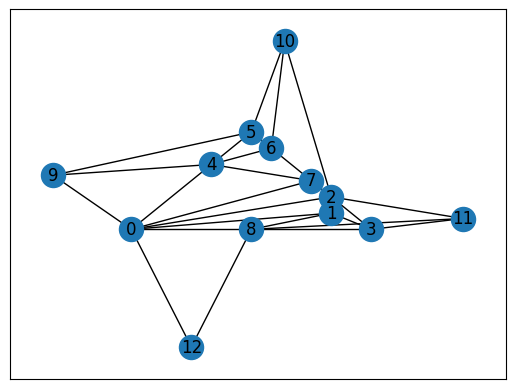

In [9]:
plot_planar(p.b.G, p.b.embed)

In [12]:
for k, v in p.b.direction_dict.items():
    ic(p.b.direction_dict[k])

ic| p.b.direction_dict[k]: (0.05747126436781608, 0.23563218390804597)
ic| p.b.direction_dict[k]: (-0.5862068965517242, -0.3620689655172414)
ic| p.b.direction_dict[k]: (0.2873563218390804, -0.27011494252873564)
ic| p.b.direction_dict[k]: (-0.5402298850574713, 0.09770114942528735)


In [13]:
list({(-0.5402298850574713, 0.09770114942528735)})[0]

(-0.5402298850574713, 0.09770114942528735)

In [14]:
p.b.four_con[get_key_by_value(p.b.four_con, p.b.direction_dict["east"], object=True)]

CornerNode({'interior_nodes': [2, 3, 8], 'name': 'east', 'node': 11, 'location': (1.2873563218390804, -0.27011494252873564), 'mean_location': (0.2873563218390804, -0.27011494252873564)})

In [15]:
d = {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5862068965517242, -0.3620689655172414)}

In [16]:
list(find_keys_with_same_value(d).values())[0]

['south', 'west']

In [17]:
find_keys_with_same_value(d)

{(-0.5862068965517242, -0.3620689655172414): ['south', 'west']}

In [18]:
coords = [v.mean_location for v in p.b.four_con.values()]
print(coords)
sc = sorted(coords, key=lambda x: x[0])
print(sc)

[(-0.5402298850574713, 0.09770114942528735), (0.05747126436781608, 0.23563218390804597), (0.2873563218390804, -0.27011494252873564), (-0.5862068965517242, -0.3620689655172414)]
[(-0.5862068965517242, -0.3620689655172414), (-0.5402298850574713, 0.09770114942528735), (0.05747126436781608, 0.23563218390804597), (0.2873563218390804, -0.27011494252873564)]


In [19]:
# Extract coordinates and labels
data = p.b.direction_dict
x_values = [coord[0] for coord in data.values()]
y_values = [coord[1] for coord in data.values()]
labels = list(data.keys())

# Create scatter plot
fig = go.Figure(data=go.Scatter(x=x_values, y=y_values, mode='markers', text=labels))

coords = [v.mean_location for v in p.b.four_con.values()]
x_values = [coord[0] for coord in coords]
y_values = [coord[1] for coord in coords]
labels = [v.node for v in p.b.four_con.values()]

fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='markers', text=labels))
# Update layout
fig.update_layout(title='Cardinal Directions Plot', xaxis_title='X-axis', yaxis_title='Y-axis')



# Show plot
fig.show()